In [5]:
import numpy as np
global np
import scipy as sp
import scipy.signal as signal
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
import wave
import warnings
warnings.filterwarnings('ignore')
sys.path.append("../backend/")
%matplotlib inline

## Fourier Series

We showed in pervious lectures that we can decompose all signals into even and odd components. We also showed from last lab that if we have two sine waves of different frequencies then they are uncorrelated. 
So, if we want to see how much 80hz content there is inside of a signal we could simply calculate 
$$\frac{1}{\pi}\int_{-\pi}^{\pi}f(t)\cos(2\pi \times 80 \times t) + \frac{1}{\pi}\int_{-\pi}^{\pi}f(t)\sin(2\pi \times 80 \times t)$$ where the left side is how much 80hz content is in the even part of the signal and the right side is how much is in the odd part of the signal. 
We can do a check for both of these at the same time by using $$e^{j \omega t} = \cos(\omega t) + j \sin(\omega t)$$ (remember the frequency detector from last time?)

So, let's start crafting a tool to generate a plot of frequency vs magnitude.
The first step is going to be to start figuring out the frequency content in the signal. 
So we can write:
$$f(t) = even + odd$$
$$f(t) = \frac{1}{\pi} \sum_{m=0}^{\infty}Even_{m} \cos(mt) + \frac{1}{\pi} \sum_{m=0}^{\infty} Odd_{m}\sin(mt)$$
where $Even_{m} = \int_{-\pi}^{\pi} f(t) \cos(mt)dt$ and $Odd_{m} = \int_{\pi}^{\pi} f(t) \sin(mt)dt$.

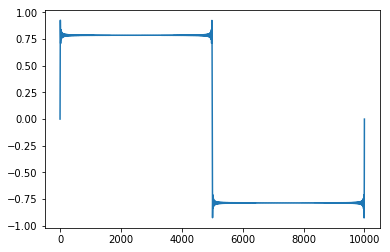

In [6]:
def fourierseries(an,bn,sr,a0=0):
    linspace = np.linspace(0.0,2*np.pi,10*sr)
    returnable = np.zeros(10*sr)
    returnable[0:] = a0/2
    if(len(an)!=len(bn)):
        print("an and bn have different lengths")
    for i in range(len(an)):
        returnable += an[i]*np.cos((i+1)*linspace) + bn[i] * np.sin((i+1)*linspace)
    return returnable
    
def bnsquarewave(n):
    if (n%2 != 0):
        return 1.0/(n)
    else:
        return 0
    
bned = [bnsquarewave(x) for x in range(1,500)]

fourier = fourierseries(np.zeros(len(bned)),bned,1000,a0=0)
plt.plot(fourier);

## Fourier Transform
The fourier series allowed us to look at discrete frequencies that are within the signal. However, in general we are going to want to be able to all frequencies. We can start doing this by increasing how how fine grained our difference between frequencies is.
$$f(t) = \frac{1}{\pi} \sum_{m=0}^{\infty}Even_{\frac{m}{T}} \cos(\frac{m}{T}t) + \frac{1}{\pi} \sum_{m=0}^{\infty} Odd_{\frac{m}{T}}\sin(\frac{m}{T}t)$$

# SLUDDS CREATE FOURIER TRANFORM FROM THIS
Prove the following properties about the fourier transform:
$ax_{1}(t)+bx_{2}(t) \text{ transforms to } aX_{1}(j\omega) + bX_{2}(j\omega)$

WRITE PROOF HERE
$x(t-t_{0}) \text{ transforms to } e^{-j\omega t_{0}}X(j\omega)$

WRITE PROOF HERE
$\frac{dx(t)}{dt} \text{ transforms to } j\omega X(j \omega)$

WRITE PROOF HERE
$x_{1}(t) * x_{2}(t) \text{ transforms to } X_{1}(j\omega)X_{2}(j\omega) $ NOTE THAT * IS CONVOLUTION

WRITE PROOF HERE


# Discrete Fourier Transform

Note that we will be working with a lot of digital signals this IAP. The standard fourier transform makes a lot of sense for continuous time signals, but in discrete time we have a slightly different transform to deal with the discrete nature of the points.
The discrete fourier transform is defined as 
$$X(k) = \sum_{n=0}^{N-1} x(n)e^{-\frac{2 \pi j k n}{N}}$$
where $N$ is the length of $x$ and $k$ is the freqency (each index into the DFT is $\frac{1}{T}$ change in frequency from the previous index where $T$ is the time domain difference in samples of $x(n)$).
We shall look at how this graphically relates to the standard Fourier Transform with the following image:
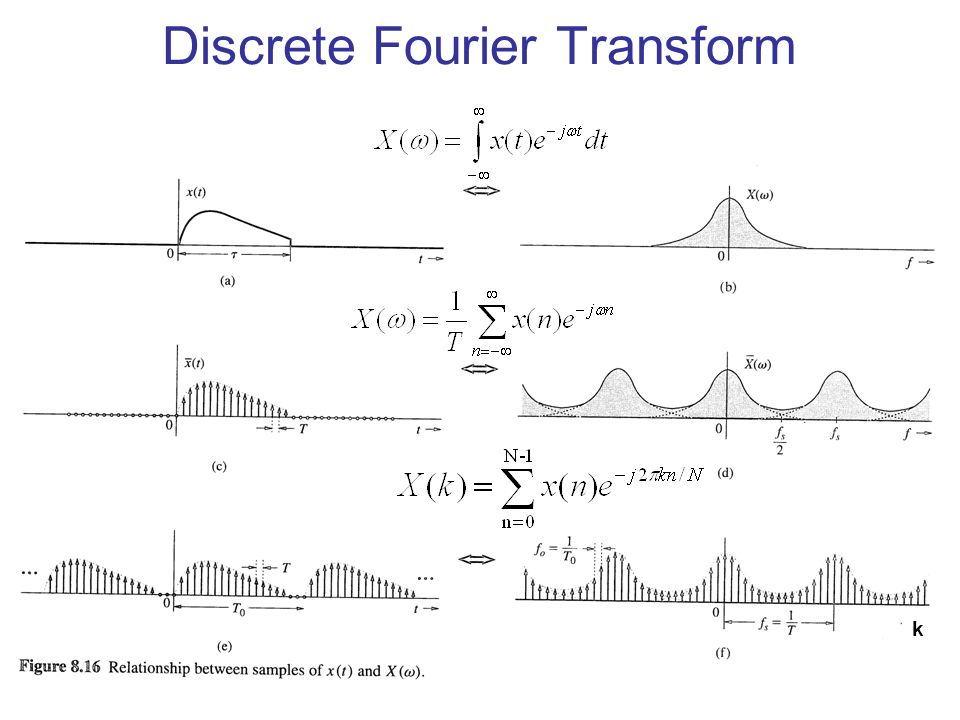


We are going to do several demos on how the discrete fourier transform looks and how we can use it. 
The first part we shall look at is using numpy's real discrete fourier transform function.

In [7]:
def cosineDFTDemo(cosinesamples,N):
    time = np.arange(cosinesamples)/float(cosinesamples)
    freq = 16.
    #N = 64
    cosine = np.cos(2*np.pi*freq*time)
    fft = np.fft.rfft(cosine,N)
    plt.figure()
    plt.plot(cosine)
    plt.show()
    plt.figure()
    plt.plot(fft)
    plt.show()
interact(cosineDFTDemo,cosinesamples=(500,5000,500),N=(1,256));

interactive(children=(IntSlider(value=2500, description='cosinesamples', max=5000, min=500, step=500), IntSlider(value=128, description='N', max=256, min=1), Output()), _dom_classes=('widget-interact',))

There are several interesting things to note. First, the highest frequency that can be shown here is $\frac{N}{2}$.
Secondly, the y-axis grows in size with N.
Thirdly, for a fixed N when we change the number of samples in our cosine we don't obtain any more resolution on the DFT (the spike at 16hz does not change in width).

That last property is really neat actually. It says that convolution in the time domain is the same thing as multiplication in the frequency domain. It's one thing to prove it, and another thing to see what that means.


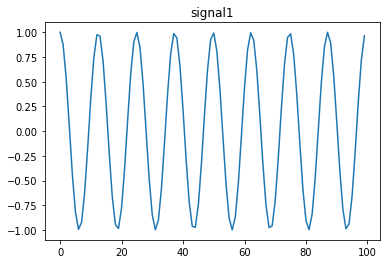

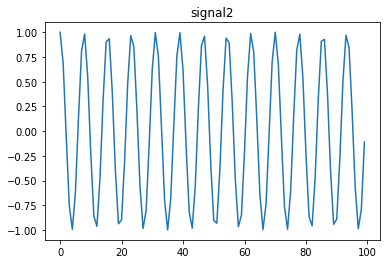

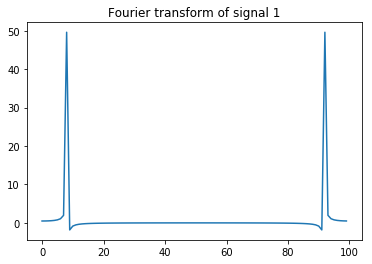

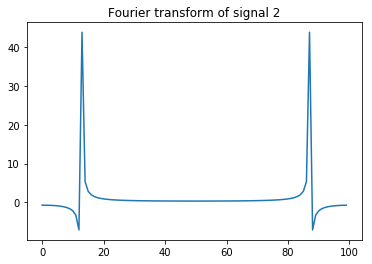

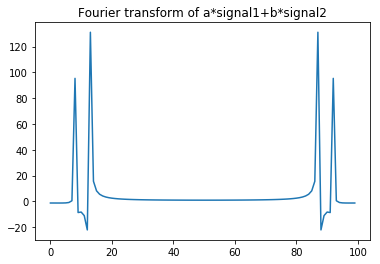

In [8]:
def linearitydemo():
    f1 = 5
    f2 = 8
    time = np.linspace(0,10,100)
    signal1 = np.cos(f1*time)
    signal2 = np.cos(f2*time)
    a = 2
    b = 3
    plt.figure()
    plt.plot(signal1)
    plt.title("signal1")
    plt.show()
    plt.figure()
    plt.plot(signal2)
    plt.title("signal2")
    plt.show()
    fourier1 = np.fft.fft(signal1)
    fourier2 = np.fft.fft(signal2)
    plt.figure()
    plt.plot(fourier1)
    plt.title("Fourier transform of signal 1")
    plt.show()
    plt.figure()
    plt.plot(fourier2)
    plt.title("Fourier transform of signal 2")
    plt.show()
    totalfourier = np.fft.fft(a*signal1+b*signal2)
    plt.figure()
    plt.plot(totalfourier)
    plt.title("Fourier transform of a*signal1+b*signal2")
    plt.show()

linearitydemo()

In [9]:
def timedelaydemo():
    pass


In [10]:
def derivativedemo():
    pass


In [11]:
def fourierconvolutiondemo():
    pass

## Short Time Fourier Transform

Sometimes we care about how frequency changes over time within our signal. This is particularly useful if we have a signal that is streaming into our processor and we want to look at the frequency content. 

We will now look at a method for increasing the frequency resolution of the short time fourier transform.

In [12]:
def zeropaddingDemo():
    pass